# Proyecto: Predicción de valores de CO2

Objetivos:
  * El objetivo principal del presente proyecto es recorrer un problema de aprendizaje supervisado de punta a punta simulando un proyecto real.
  
  * El objetivo del desafío es llegar a la predicción de los valores de emisión de CO2 de los motores en función de sus características. Para llegar a esa predicción se estructurará el proyecto en las etapas típicas de un proyecto de aprendizaje a partir de datos:

    1. comprensión del problema
    2. estudio de los datos disponibles incluyendo una exploración de los mismos
    3. modelado
    4. evaluación
    5. pasaje a producción




**Referencia:**

https://www.kaggle.com/datasets/brsahan/vehicle-co2-emissions-dataset/data

# Acceso a los datos

In [ ]:
# download data with gdown
!gdown --id 1MIswAgCfsWeEaXz4gvLNNwk-jr9EYnBZ

/usr/local/lib/python3.10/dist-packages/gdown/__main__.py:140: FutureWarning: Option `--id` was deprecated in version 4.3.1 and will be removed in 5.0. You don't need to pass it anymore to use a file ID.
  warnings.warn(
Downloading...
From: https://drive.google.com/uc?id=1MIswAgCfsWeEaXz4gvLNNwk-jr9EYnBZ
To: /content/co2.csv
100% 476k/476k [00:00<00:00, 117MB/s]


In [ ]:
# load csv with pandas
import pandas as pd

df = pd.read_csv('co2.csv')

In [ ]:
# visualize csv head, shape and columns
df.head()
print(df.shape)
df.info()

(7385, 12)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7385 entries, 0 to 7384
Data columns (total 12 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Make                              7385 non-null   object 
 1   Model                             7385 non-null   object 
 2   Vehicle Class                     7385 non-null   object 
 3   Engine Size(L)                    7385 non-null   float64
 4   Cylinders                         7385 non-null   int64  
 5   Transmission                      7385 non-null   object 
 6   Fuel Type                         7385 non-null   object 
 7   Fuel Consumption City (L/100 km)  7385 non-null   float64
 8   Fuel Consumption Hwy (L/100 km)   7385 non-null   float64
 9   Fuel Consumption Comb (L/100 km)  7385 non-null   float64
 10  Fuel Consumption Comb (mpg)       7385 non-null   int64  
 11  CO2 Emissions(g/km)               7385 non-null   int64  


# Descripción del problema
*Escriba con sus palabras el problema y los objetivos*


El objetivo de este proyecto es predecir las **emisiones de CO2** de vehículos en función de diversas variables contenidas en nuestra base de datos. Para lograrlo, aplicaremos las etapas típicas de un proyecto de Machine Learning.

Las variables que utilizaremos para realizar las predicciones son:

* Make: Marca del vehículo.
* Model: Modelo del vehículo.
* Vehicle Class: Clase del vehículo (por ejemplo, SUV, sedán).
* Engine Size: Tamaño del motor (en litros).
* Cilinders: Número de cilindros del motor.
* Transmission: Tipo de transmisión (manual o automática).
* Fuel Type: Tipo de combustible utilizado (gasolina, diésel, etc.).
* Fuel Consumption City (L/100 km): Consumo de combustible en ciudad (litros por cada 100 km).
* Fuel Consumption Hwy (L/100 km): Consumo de combustible en carretera (litros por cada 100 km).
* Fuel Consumption Comb (L/100 km): Consumo de combustible combinado (litros por cada 100 km).
* Fuel Consumption Comb (mpg): Consumo de combustible combinado en millas por galón.
* CO2 Emissions (g/km): Emisiones de CO2 (gramos por kilómetro).

# Exploración de los datos
*Realice una exploración de los datos y documento los hallazgos principales. Esta etapa exploratoria (EDA) es fundamental para comprender los datos y relacionarlos con el problema. Puede tomar como referencia las actividades típicas de esta etapa: a) entendimientos de los datos en cuento a cantidad de registros, atributos y tipos de datos, b) extracción de estadísticas descriptivas básicas, revisión de los datos para identificar registros anómalos, datos faltantes o outliers, c) limpieza de datos para resolver los posibles problemas de datos faltantes o inconsistencias, d) exploración de las variables mediante análisis estadístico (histogramas, min, max, etc.) luego de la limpieza, e) explorar correlaciones entre los atributos y entre los atributos y la clase objetivo, f) verificación que la calidad de datos es adecuada para cumplir con los objetivoos planteados, g) documentar los hallazgos alineados con los objetivos (ejemplo: identificando atributos que tienen correlación con la variable objetivo).*

**Apartado a)**

In [ ]:
# Cantidad de registros y atributos
num_registros, num_atributos = df.shape
print(f"Número de registros: {num_registros}")
print(f"Número de atributos: {num_atributos}")

# Tipos de datos de cada atributo
print("\nTipos de datos de cada atributo:")
print(df.dtypes)

Número de registros: 7385
Número de atributos: 12

Tipos de datos de cada atributo:
Make                                 object
Model                                object
Vehicle Class                        object
Engine Size(L)                      float64
Cylinders                             int64
Transmission                         object
Fuel Type                            object
Fuel Consumption City (L/100 km)    float64
Fuel Consumption Hwy (L/100 km)     float64
Fuel Consumption Comb (L/100 km)    float64
Fuel Consumption Comb (mpg)           int64
CO2 Emissions(g/km)                   int64
dtype: object


**Apartado b)**

In [ ]:

# Revisión de estadísticas descriptivas
print("Estadísticas descriptivas:\n")
print(df.describe())


# Revisión de estadísticas para variables categóricas
print("\nEstadísticas para variables categóricas:\n")
print(df.describe(include=['object']))


Estadísticas descriptivas:

       Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     7385.000000  7385.000000                       7385.000000   
mean         3.160068     5.615030                         12.556534   
std          1.354170     1.828307                          3.500274   
min          0.900000     3.000000                          4.200000   
25%          2.000000     4.000000                         10.100000   
50%          3.000000     6.000000                         12.100000   
75%          3.700000     6.000000                         14.600000   
max          8.400000    16.000000                         30.600000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      7385.000000                       7385.000000   
mean                          9.041706                         10.975071   
std                           2.224456                          2.892506   
min                

**Apartado c)**

In [ ]:
print(f"Número de registros: {num_registros}")

# Revisión de datos faltantes
print("\nDatos faltantes en cada columna:")
print(df.isnull().sum())

# Revisión de duplicados
print("\nNúmero de registros duplicados:")
print(df.duplicated().sum())

# Eliminar registros duplicados
df_cleaned = df.drop_duplicates()

# Mostrar el número de registros después de eliminar duplicados
print(f"\nNúmero de registros después de eliminar duplicados: {df_cleaned.shape[0]}")




Número de registros: 7385

Datos faltantes en cada columna:
Make                                0
Model                               0
Vehicle Class                       0
Engine Size(L)                      0
Cylinders                           0
Transmission                        0
Fuel Type                           0
Fuel Consumption City (L/100 km)    0
Fuel Consumption Hwy (L/100 km)     0
Fuel Consumption Comb (L/100 km)    0
Fuel Consumption Comb (mpg)         0
CO2 Emissions(g/km)                 0
dtype: int64

Número de registros duplicados:
1103

Número de registros después de eliminar duplicados: 6282


**Apartado d)**

Estadísticas descriptivas:

       Engine Size(L)    Cylinders  Fuel Consumption City (L/100 km)  \
count     6282.000000  6282.000000                       6282.000000   
mean         3.161812     5.618911                         12.610220   
std          1.365201     1.846250                          3.553066   
min          0.900000     3.000000                          4.200000   
25%          2.000000     4.000000                         10.100000   
50%          3.000000     6.000000                         12.100000   
75%          3.700000     6.000000                         14.700000   
max          8.400000    16.000000                         30.600000   

       Fuel Consumption Hwy (L/100 km)  Fuel Consumption Comb (L/100 km)  \
count                      6282.000000                       6282.000000   
mean                          9.070583                         11.017876   
std                           2.278884                          2.946876   
min                

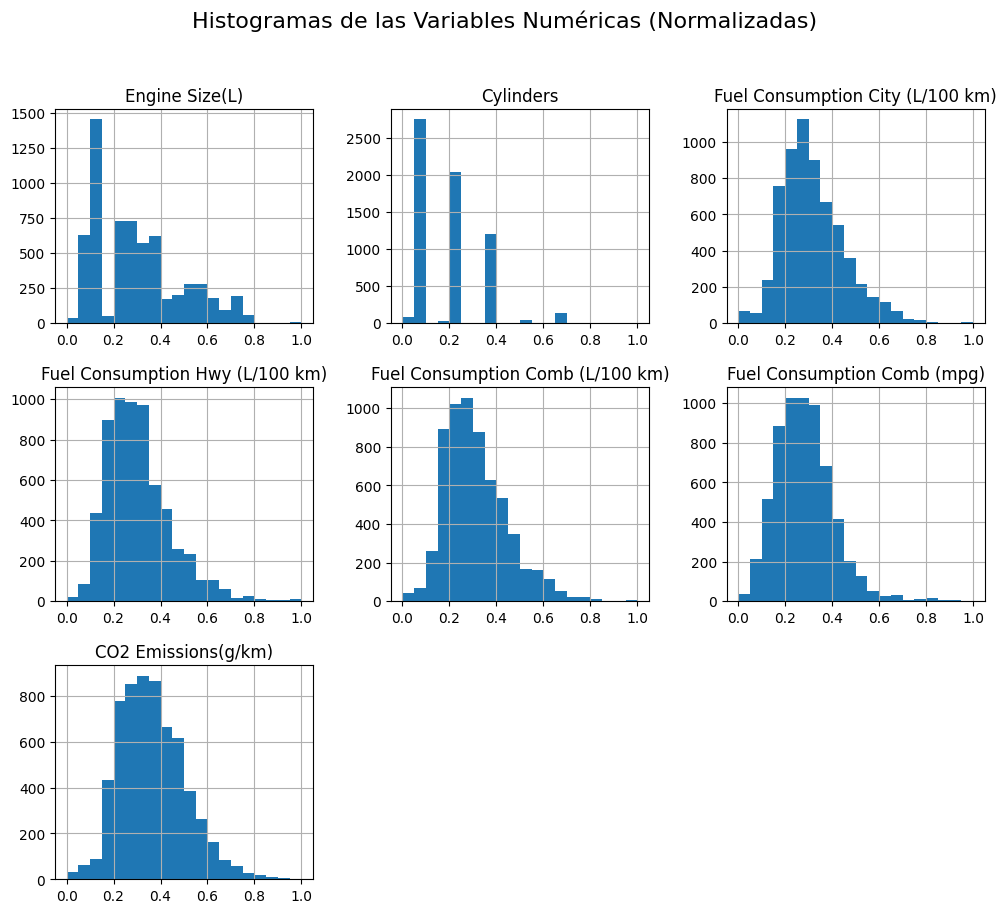

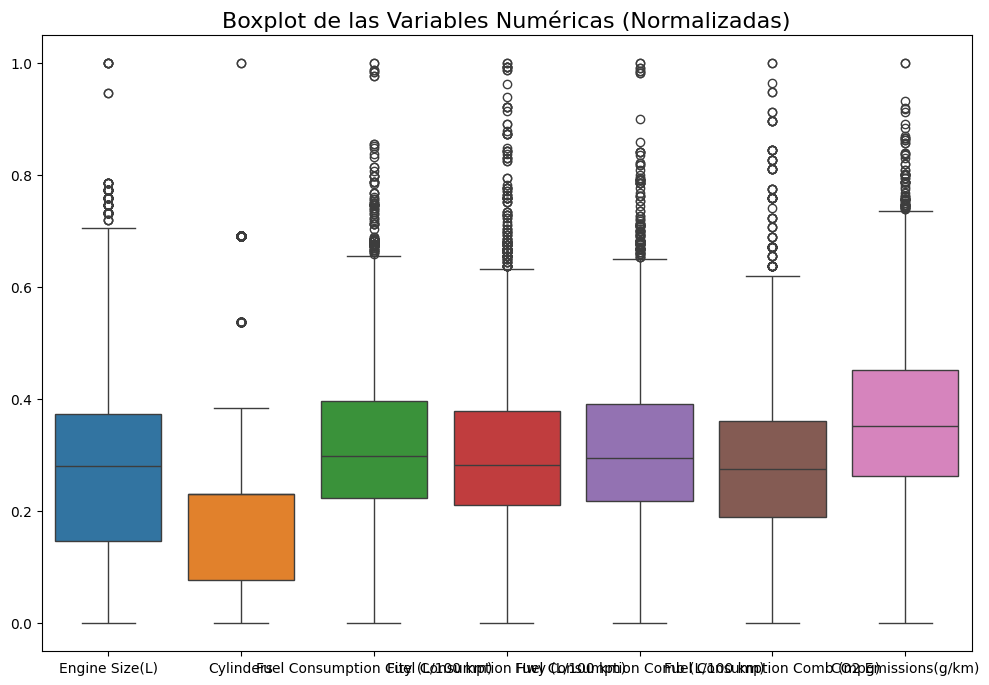


Valores mínimos y máximos de las variables numéricas (normalizadas):
Engine Size(L) - Min: 0.0 | Max: 1.0
Cylinders - Min: 0.0 | Max: 1.0
Fuel Consumption City (L/100 km) - Min: 0.0 | Max: 0.9999999999999999
Fuel Consumption Hwy (L/100 km) - Min: 0.0 | Max: 0.9999999999999999
Fuel Consumption Comb (L/100 km) - Min: 0.0 | Max: 1.0000000000000002
Fuel Consumption Comb (mpg) - Min: 0.0 | Max: 1.0
CO2 Emissions(g/km) - Min: 0.0 | Max: 0.9999999999999999

Outliers en 'Engine Size(L)': 121 registros (1.93%)

Outliers en 'Cylinders': 177 registros (2.82%)

Outliers en 'Fuel Consumption City (L/100 km)': 116 registros (1.85%)

Outliers en 'Fuel Consumption Hwy (L/100 km)': 150 registros (2.39%)

Outliers en 'Fuel Consumption Comb (L/100 km)': 115 registros (1.83%)

Outliers en 'Fuel Consumption Comb (mpg)': 95 registros (1.51%)

Outliers en 'CO2 Emissions(g/km)': 74 registros (1.18%)

Outliers en Engine Size(L):
     Engine Size(L)  Cylinders  Fuel Consumption City (L/100 km)  \
36         0.

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

# Revisión de estadísticas descriptivas
print("Estadísticas descriptivas:\n")
print(df_cleaned.describe())

# Revisión de estadísticas para variables categóricas
print("\nEstadísticas para variables categóricas:\n")
print(df_cleaned.describe(include=['object']))

# Seleccionar solo las columnas numéricas
numerical_columns = df_cleaned.select_dtypes(include=['number'])

# Normalizamos solo las columnas numéricas sin alterar el DataFrame original
scaler = MinMaxScaler()
normalized_columns = scaler.fit_transform(numerical_columns)

# Crear un DataFrame con los datos normalizados
normalized_df = pd.DataFrame(normalized_columns, columns=numerical_columns.columns, index=df_cleaned.index)

# Histograma para variables numéricas normalizadas
normalized_df.hist(bins=20, figsize=(12, 10))
plt.suptitle("Histogramas de las Variables Numéricas (Normalizadas)", fontsize=16)
plt.show()

# Boxplot para detectar outliers (valores atípicos) en los datos normalizados
plt.figure(figsize=(12, 8))
sns.boxplot(data=normalized_df)
plt.title("Boxplot de las Variables Numéricas (Normalizadas)", fontsize=16)
plt.show()

# Revisar valores mínimos y máximos de las columnas normalizadas
print("\nValores mínimos y máximos de las variables numéricas (normalizadas):")
for col in normalized_df.columns:
    print(f"{col} - Min: {normalized_df[col].min()} | Max: {normalized_df[col].max()}")

# Detectar outliers utilizando el rango intercuartílico (IQR) en los datos normalizados
outliers = {}
for col in normalized_df.columns:
    Q1 = normalized_df[col].quantile(0.25)
    Q3 = normalized_df[col].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR

    # Identificar outliers
    outliers[col] = normalized_df[(normalized_df[col] < lower_bound) | (normalized_df[col] > upper_bound)]

    # Calcular el porcentaje de outliers
    outliers_percentage = (len(outliers[col]) / len(normalized_df)) * 100
    print(f"\nOutliers en '{col}': {len(outliers[col])} registros ({outliers_percentage:.2f}%)")

# Mostrar las filas con outliers para cada columna (si es necesario)
for col in normalized_df.columns:
    if len(outliers[col]) > 0:
        print(f"\nOutliers en {col}:")
        print(outliers[col].head())  # Muestra los primeros outliers de cada columna

# Observamos como la mayoría de los outliers corresponden a coches de alta gama/deportivos.



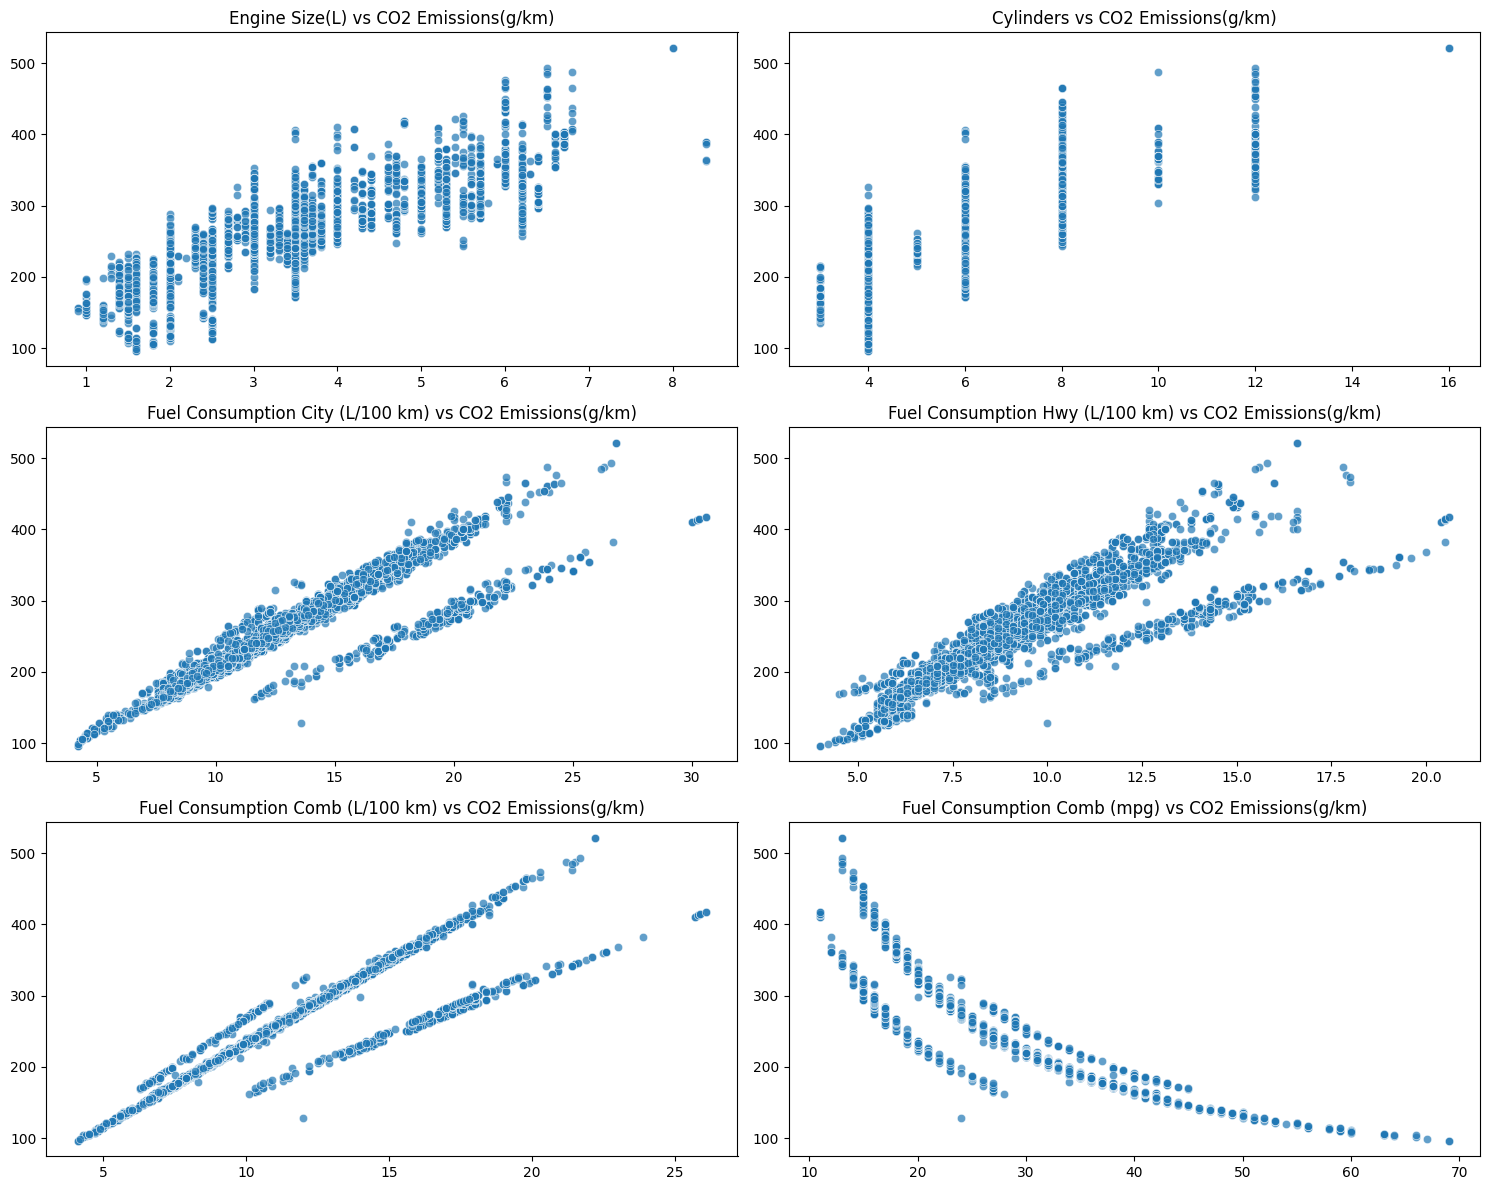

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Variables categóricas y numéricas

numeric_vars = ['Engine Size(L)', 'Cylinders', 'Fuel Consumption City (L/100 km)',
                'Fuel Consumption Hwy (L/100 km)', 'Fuel Consumption Comb (L/100 km)',
                'Fuel Consumption Comb (mpg)']

# Configuración del grid para gráficos numéricos
n_cols = 2
n_rows = (len(numeric_vars) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, n_rows * 4))
axes = axes.flatten()

for i, num_var in enumerate(numeric_vars):
    sns.scatterplot(data=df_cleaned, x=num_var, y='CO2 Emissions(g/km)', alpha=0.7, ax=axes[i])
    axes[i].set_title(f'{num_var} vs CO2 Emissions(g/km)', fontsize=12)
    axes[i].set_xlabel("")
    axes[i].set_ylabel("")

# Eliminar gráficos vacíos si los hay
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()



**Apartado e)**

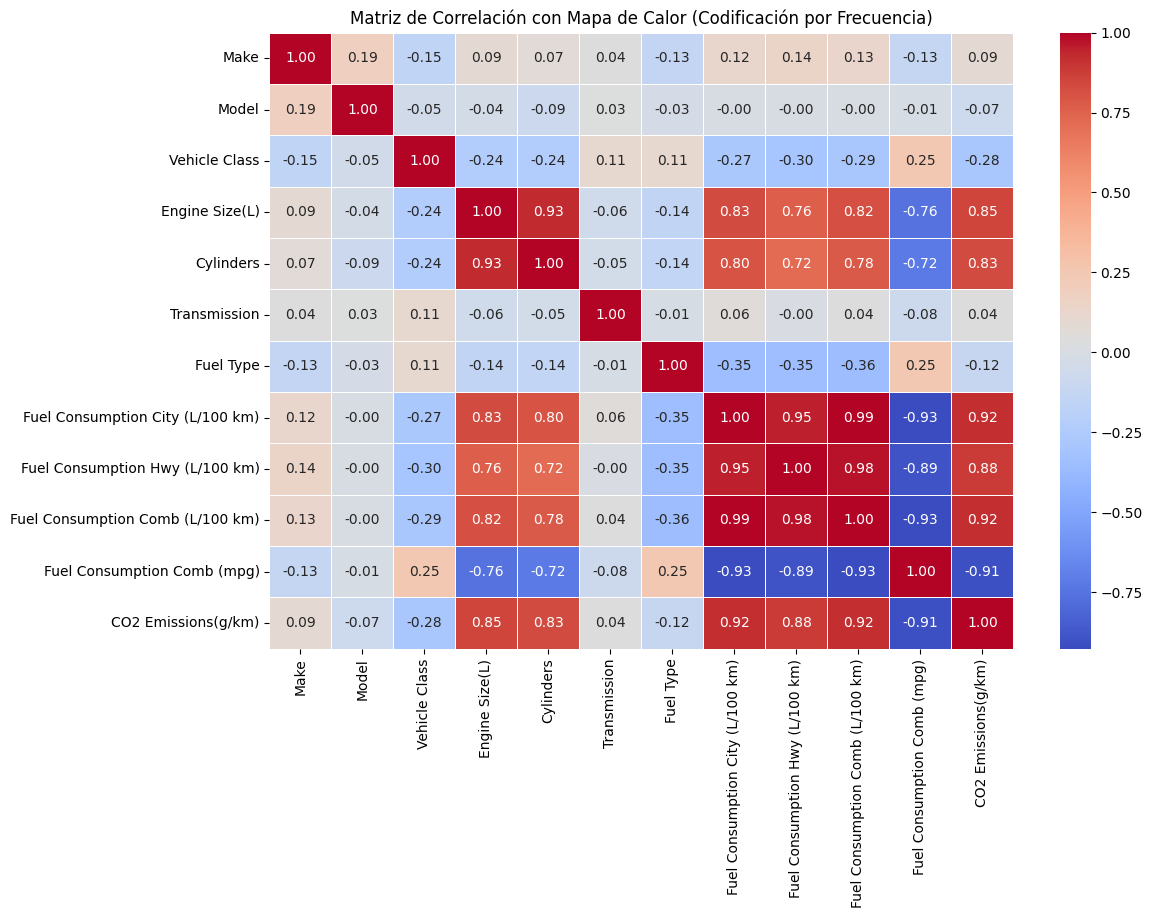

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Supón que df es tu DataFrame original

# Seleccionar las columnas categóricas
categorical_columns = df.select_dtypes(include=['object']).columns

# Crear una copia para no modificar el DataFrame original
df_encoded = df.copy()

# Codificación por Frecuencia
for column in categorical_columns:
    freq_encoding = df[column].value_counts() / len(df)  # Calcular la frecuencia de cada categoría
    df_encoded[column] = df[column].map(freq_encoding)  # Reemplazar las categorías por su frecuencia

# Calcular la matriz de correlación entre todas las columnas (tanto numéricas como codificadas)
correlation = df_encoded.corr()

# Crear un mapa de calor de la matriz de correlación
plt.figure(figsize=(12, 8))  # Ajusta el tamaño de la figura
sns.heatmap(correlation, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)

# Añadir título y mostrar el mapa de calor
plt.title('Matriz de Correlación con Mapa de Calor (Codificación por Frecuencia)')
plt.show()





**Apartado f) y e)**

In [ ]:
import pandas as pd

# Vamos a eliminar las variables altamente correlacionadas 'Fuel Consumption City (L/100 km)' y 'Fuel Consumption Hwy (L/100 km)'. El resto lo elimnamos debido a que el modelo mejora sin ellos.

df_cleaned = df_cleaned.drop(columns=['Model', 'Make', 'Vehicle Class', 'Transmission','Fuel Consumption City (L/100 km)', 'Fuel Consumption Hwy (L/100 km)'])

#Transformar las variables cualitativas en categóricas mediante "One Hot Encoding"

df_cleaned_encoded = pd.get_dummies(df_cleaned, columns=['Fuel Type'])

# Verificar que las columnas han sido eliminadas
print(df_cleaned_encoded.head())



   Engine Size(L)  Cylinders  Fuel Consumption Comb (L/100 km)  \
0             2.0          4                               8.5   
1             2.4          4                               9.6   
2             1.5          4                               5.9   
3             3.5          6                              11.1   
4             3.5          6                              10.6   

   Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  Fuel Type_D  Fuel Type_E  \
0                           33                  196        False        False   
1                           29                  221        False        False   
2                           48                  136        False        False   
3                           25                  255        False        False   
4                           27                  244        False        False   

   Fuel Type_N  Fuel Type_X  Fuel Type_Z  
0        False        False         True  
1        False        False   

# Modelado
*En base al entendimiento del problema y los datos, establecer un plan preliminar del proyecto. ¿Qué abordaje se seguirá? ¿Qué algoritmos se consideran adecuados para alcanzar con los objetivos? Se sugiere seleccionar y justificar 3 modelos diferentes a desarrollar.*

Vamos a trabajar con y sin variables categóricas. Lógicamente podríamos hacer infinitas variaciones tantos en las variables como en los hiperparametros. Para simplificar todo vamos a comparar con y sin variables categóricas los módelos mas representativos. No añadimos DecisionTree debido a que Random Forest suele tener una mayor precisión.

**Con variables categóricas: Fuel Type (One-Hot Encoding)**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Variables predictoras y variable objetivo
X = df_cleaned_encoded.drop(columns=['CO2 Emissions(g/km)'])  # Eliminar la columna objetivo de las variables predictoras
y = df_cleaned_encoded['CO2 Emissions(g/km)']

# Dividir los datos en entrenamiento y prueba (80% para entrenamiento, 20% para prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Modelo de Regresión Lineal
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# Predicciones y cálculo de R^2 para regresión lineal
y_pred_train_linear = model_linear.predict(X_train)
y_pred_test_linear = model_linear.predict(X_test)

r2_train_linear = r2_score(y_train, y_pred_train_linear)
r2_test_linear = r2_score(y_test, y_pred_test_linear)

print(f"R^2 Regresión Lineal (Entrenamiento): {r2_train_linear}")
print(f"R^2 Regresión Lineal (Prueba): {r2_test_linear}")
print("\n")  # Espacio entre los modelos

# 2. Modelo de K-Vecinos más Cercanos (KNN)
model_knn = KNeighborsRegressor()
model_knn.fit(X_train, y_train)

# Predicciones y cálculo de R^2 para KNN
y_pred_train_knn = model_knn.predict(X_train)
y_pred_test_knn = model_knn.predict(X_test)

r2_train_knn = r2_score(y_train, y_pred_train_knn)
r2_test_knn = r2_score(y_test, y_pred_test_knn)

print(f"R^2 K-Vecinos más Cercanos (Entrenamiento): {r2_train_knn}")
print(f"R^2 K-Vecinos más Cercanos (Prueba): {r2_test_knn}")
print("\n")  # Espacio entre los modelos

# 3. Modelo de Random Forest
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# Predicciones y cálculo de R^2 para Random Forest
y_pred_train_rf = model_rf.predict(X_train)
y_pred_test_rf = model_rf.predict(X_test)

r2_train_rf = r2_score(y_train, y_pred_train_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

print(f"R^2 Random Forest (Entrenamiento): {r2_train_rf}")
print(f"R^2 Random Forest (Prueba): {r2_test_rf}")

#Observamos como el modelo de regresion lineal aparentemente es muy malo


R^2 Regresión Lineal (Entrenamiento): 0.9924752393944913
R^2 Regresión Lineal (Prueba): 0.9910088934533204


R^2 K-Vecinos más Cercanos (Entrenamiento): 0.9967162814820694
R^2 K-Vecinos más Cercanos (Prueba): 0.993507120762887


R^2 Random Forest (Entrenamiento): 0.998626289901676
R^2 Random Forest (Prueba): 0.9958270176653053


**Sin variables categóricas**

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Seleccionar solo las columnas numéricas
X = df_cleaned.select_dtypes(include=['number'])  # Esto selecciona solo las columnas numéricas
X = X.drop(columns=['CO2 Emissions(g/km)'])  # Eliminar la columna objetivo de las variables predictoras
y = df_cleaned['CO2 Emissions(g/km)']

# Dividir los datos en entrenamiento y prueba (80% para entrenamiento, 20% para prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# 1. Modelo de Regresión Lineal
model_linear = LinearRegression()
model_linear.fit(X_train, y_train)

# Predicciones y cálculo de R^2 para regresión lineal
y_pred_train_linear = model_linear.predict(X_train)
y_pred_test_linear = model_linear.predict(X_test)

r2_train_linear = r2_score(y_train, y_pred_train_linear)
r2_test_linear = r2_score(y_test, y_pred_test_linear)

print(f"R^2 Regresión Lineal (Entrenamiento): {r2_train_linear}")
print(f"R^2 Regresión Lineal (Prueba): {r2_test_linear}")
print("\n")  # Espacio entre los modelos

# 2. Modelo de K-Vecinos más Cercanos (KNN)
model_knn = KNeighborsRegressor()
model_knn.fit(X_train, y_train)

# Predicciones y cálculo de R^2 para KNN
y_pred_train_knn = model_knn.predict(X_train)
y_pred_test_knn = model_knn.predict(X_test)

r2_train_knn = r2_score(y_train, y_pred_train_knn)
r2_test_knn = r2_score(y_test, y_pred_test_knn)

print(f"R^2 K-Vecinos más Cercanos (Entrenamiento): {r2_train_knn}")
print(f"R^2 K-Vecinos más Cercanos (Prueba): {r2_test_knn}")
print("\n")  # Espacio entre los modelos

# 3. Modelo de Random Forest
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# Predicciones y cálculo de R^2 para Random Forest
y_pred_train_rf = model_rf.predict(X_train)
y_pred_test_rf = model_rf.predict(X_test)

r2_train_rf = r2_score(y_train, y_pred_train_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

print(f"R^2 Random Forest (Entrenamiento): {r2_train_rf}")
print(f"R^2 Random Forest (Prueba): {r2_test_rf}")


R^2 Regresión Lineal (Entrenamiento): 0.903130430288608
R^2 Regresión Lineal (Prueba): 0.8960373505071431


R^2 K-Vecinos más Cercanos (Entrenamiento): 0.9781039443790469
R^2 K-Vecinos más Cercanos (Prueba): 0.9665241322743924


R^2 Random Forest (Entrenamiento): 0.9899262192147328
R^2 Random Forest (Prueba): 0.9696053858864394


**El modelo Random Forest es significativamente mejor con la variable categóricas "Fuel Type"**

# Evaluación
*Evaluación de los modelos desarrollados para seleccionar el más adecuado para cumplir con los objetivos planteados al inicio.*

El modelo con variables categóricas "RandomForest" ha demostrado un desempeño increíblemente bueno. No hemos modificado hiperparametros para no añadir más carga computacional, dado que sin modificar nada sale "perfecto" en la práctica

R^2 Random Forest (Entrenamiento): 0.998 (Aproximado)

R^2 Random Forest (Prueba): 0.9958 (Aproximado)

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score

# Variables predictoras y variable objetivo
X = df_cleaned_encoded.drop(columns=['CO2 Emissions(g/km)'])  # Eliminar la columna objetivo de las variables predictoras
y = df_cleaned_encoded['CO2 Emissions(g/km)']

# Dividir los datos en entrenamiento y prueba (80% para entrenamiento, 20% para prueba)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Modelo de Random Forest
model_rf = RandomForestRegressor()
model_rf.fit(X_train, y_train)

# Predicciones y cálculo de R^2 para Random Forest
y_pred_train_rf = model_rf.predict(X_train)
y_pred_test_rf = model_rf.predict(X_test)

r2_train_rf = r2_score(y_train, y_pred_train_rf)
r2_test_rf = r2_score(y_test, y_pred_test_rf)

print(f"R^2 Random Forest (Entrenamiento): {r2_train_rf}")
print(f"R^2 Random Forest (Prueba): {r2_test_rf}")

#Observamos como el modelo de regresion lineal aparentemente es muy malo


R^2 Random Forest (Entrenamiento): 0.9986225494586062
R^2 Random Forest (Prueba): 0.9957470171609027


In [ ]:
print(df_cleaned_encoded.head())

   Engine Size(L)  Cylinders  Fuel Consumption Comb (L/100 km)  \
0             2.0          4                               8.5   
1             2.4          4                               9.6   
2             1.5          4                               5.9   
3             3.5          6                              11.1   
4             3.5          6                              10.6   

   Fuel Consumption Comb (mpg)  CO2 Emissions(g/km)  Fuel Type_D  Fuel Type_E  \
0                           33                  196        False        False   
1                           29                  221        False        False   
2                           48                  136        False        False   
3                           25                  255        False        False   
4                           27                  244        False        False   

   Fuel Type_N  Fuel Type_X  Fuel Type_Z  
0        False        False         True  
1        False        False   

# Producción
*Deberán desarrollar una función que recibirá un registro único de datos y deberá devolver el valor de CO2 estimado. Esta función debe "cargar" el modelo generado anteriormente sin necesidad de pasar por las etapas de aprendizaje.*

In [ ]:
import joblib
import pandas as pd

# Guardar el modelo entrenado en un archivo
joblib.dump(model_rf, 'random_forest_model.joblib')

# Función para cargar el modelo y predecir
def predict_co2_emission(input_data):
    # Cargar el modelo entrenado
    loaded_model = joblib.load('random_forest_model.joblib')

    # Crear un DataFrame a partir del registro de entrada
    input_df = pd.DataFrame([input_data])

    # Realizar la predicción
    predicted_co2 = loaded_model.predict(input_df)[0]

    return predicted_co2

# Ejemplo de uso
example_input = {
    'Engine Size(L)': 3.5,
    'Cylinders': 6,
    'Fuel Consumption Comb (L/100 km)': 10.6,
    'Fuel Consumption Comb (mpg)': 27,
    'Fuel Type_D': 0,
    'Fuel Type_E': 0,
    'Fuel Type_N': 0,
    'Fuel Type_X': 0,
    'Fuel Type_Z': 1
}

predicted_value = predict_co2_emission(example_input)
print(f"Predicción de Emisión de CO2: {predicted_value} g/km")



Predicción de Emisión de CO2: 244.38099080004966 g/km
